In [3]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Simulate dataset
np.random.seed(42)
n_samples = 1000
data = pd.DataFrame({
    'consistency': np.random.rand(n_samples),
    'aptitude_score': np.random.normal(70, 10, n_samples),
    'sincerity_index': np.random.rand(n_samples),
    'test_performance': np.random.normal(75, 12, n_samples),
    'psychometric_score': np.random.rand(n_samples),
    'approved': np.random.choice([0, 1], size=n_samples, p=[0.4, 0.6])
})
data.head()

,consistency,aptitude_score,sincerity_index,test_performance,psychometric_score,approved
0,0.374540,71.777010,0.971533,89.849258,0.013862,0
1,0.950714,56.646556,0.331347,69.512380,0.649379,0
2,0.731994,73.801979,0.482041,74.486119,0.668877,0
3,0.598658,76.105857,0.196098,75.696273,0.798656,0
4,0.156019,75.597904,0.610780,85.181171,0.932753,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   consistency         1000 non-null   float64
 1   aptitude_score      1000 non-null   float64
 2   sincerity_index     1000 non-null   float64
 3   test_performance    1000 non-null   float64
 4   psychometric_score  1000 non-null   float64
 5   approved            1000 non-null   int32  
dtypes: float64(5), int32(1)
memory usage: 43.1 KB


In [7]:

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
features = ['consistency', 'aptitude_score', 'sincerity_index', 'test_performance', 'psychometric_score']
data[features] = scaler.fit_transform(data[features])

weights = {
    'consistency': 0.2,
    'aptitude_score': 0.25,
    'sincerity_index': 0.2,
    'test_performance': 0.25,
    'psychometric_score': 0.1
}

data['FPS'] = sum(data[f] * w for f, w in weights.items())
data[['FPS', 'approved']].head()

,FPS,approved
0,0.549978,0
1,0.477993,0
2,0.551313,0
3,0.493261,0
4,0.527333,0


In [8]:
# Train/test split
X = data[['FPS']]
y = data['approved']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.49      0.48      0.49        93
           1       0.56      0.56      0.56       107

    accuracy                           0.53       200
   macro avg       0.52      0.52      0.52       200
weighted avg       0.52      0.53      0.52       200



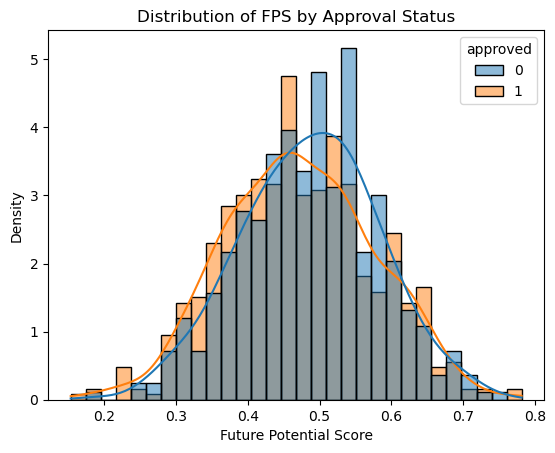

In [9]:
# FPS vs Approval
sns.histplot(data=data, x='FPS', hue='approved', bins=30, kde=True, stat='density', common_norm=False)
plt.title('Distribution of FPS by Approval Status')
plt.xlabel('Future Potential Score')
plt.ylabel('Density')
plt.show()

In [6]:
import joblib
joblib.dump(model, 'loan_approval_model.pkl')

['loan_approval_model.pkl']

In [9]:
# Save this in a separate Python file (api.py)
# api.py
!pip install fastapi
